<a href="https://colab.research.google.com/github/RafaelAntunes21/lia1-2023-2/blob/main/ENTREGAS%20-%20Rafael%20Antunes/Arvore_de_decisao_JogarTenis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
base_jogar_tenis = pd.read_csv("/content/drive/MyDrive/Jogartenis.csv")

In [4]:
base_jogar_tenis

,Tempo,Temperatura,Umidade,Vento,JogarTênis
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Moderada,Alta,Fraco,Sim
4,Chuvoso,Agrádavel,Normal,Fraco,Sim
5,Chuvoso,Agrádavel,Normal,Forte,Não
6,Nublado,Agrádavel,Normal,Forte,Sim
7,Ensolarado,Moderada,Alta,Fraco,Não
8,Ensolarado,Agrádavel,Normal,Fraco,Sim
9,Chuvoso,Moderada,Normal,Fraco,Sim


In [5]:
X_jogar_tenis = base_jogar_tenis.iloc[:, 0:4].values
X_jogar_tenis

array([['Ensolarado', 'Quente', 'Alta', 'Fraco'],
       ['Ensolarado', 'Quente', 'Alta', 'Forte'],
       ['Nublado', 'Quente', 'Alta', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Alta', 'Fraco'],
       ['Chuvoso', 'Agrádavel', 'Normal', 'Fraco'],
       ['Chuvoso', 'Agrádavel', 'Normal', 'Forte'],
       ['Nublado', 'Agrádavel', 'Normal', 'Forte'],
       ['Ensolarado', 'Moderada', 'Alta', 'Fraco'],
       ['Ensolarado', 'Agrádavel', 'Normal', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Normal', 'Fraco'],
       ['Ensolarado', 'Moderada', 'Normal', 'Forte'],
       ['Nublado', 'Moderada', 'Alta', 'Fraco'],
       ['Nublado', 'Quente', 'Normal', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Alta', 'Forte']], dtype=object)

In [6]:
y_jogar_tenis = base_jogar_tenis.iloc[:, 4].values
y_jogar_tenis

array(['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Não'], dtype=object)

In [7]:
## converte atributos categóricos em valores numéricos
from sklearn.preprocessing import LabelEncoder

label_encoder_Tempo = LabelEncoder()
label_encoder_Temperatura = LabelEncoder()
label_encoder_Umidade = LabelEncoder()
label_encoder_Vento = LabelEncoder()

In [9]:
X_jogar_tenis[:,0] = label_encoder_Tempo.fit_transform(X_jogar_tenis[:,0])
X_jogar_tenis[:,1] = label_encoder_Temperatura.fit_transform(X_jogar_tenis[:,1])
X_jogar_tenis[:,2] = label_encoder_Umidade.fit_transform(X_jogar_tenis[:,2])
X_jogar_tenis[:,3] = label_encoder_Vento.fit_transform(X_jogar_tenis[:,3])

In [10]:
X_jogar_tenis

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

In [11]:
import pickle
with open('jogar_tenis.pkl', 'wb') as f:
  pickle.dump([X_jogar_tenis, y_jogar_tenis], f)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
with open('/content/jogar_tenis.pkl', 'rb') as f:
  X_jogar_tenis, y_jogar_tenis = pickle.load(f)

In [15]:
arvore_jogar_tenis = DecisionTreeClassifier(criterion='entropy')

arvore_jogar_tenis.fit(X_jogar_tenis, y_jogar_tenis)

DecisionTreeClassifier(criterion='entropy')

In [17]:
## qual é o atributo mais importante
arvore_jogar_tenis.feature_importances_

array([0.51455805, 0.        , 0.21123658, 0.27420537])

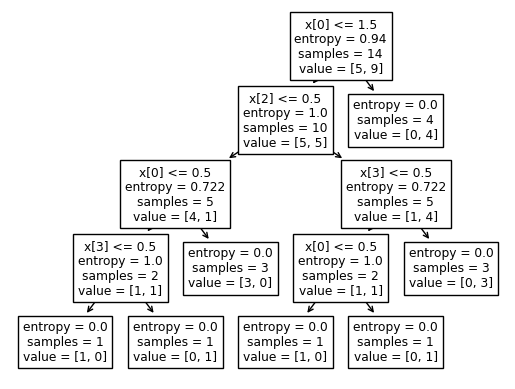

In [18]:
# visualizar a árvore de decisão
from sklearn import tree
tree.plot_tree(arvore_jogar_tenis);

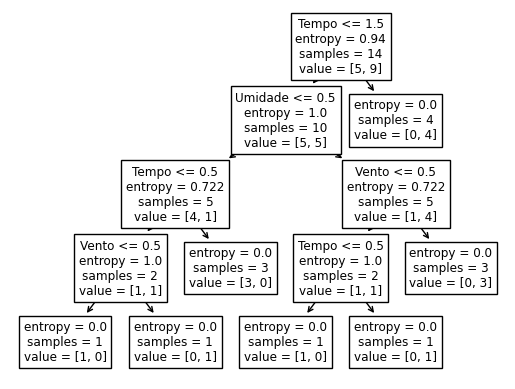

In [19]:
previsores = ['Tempo', 'Temperatura', 'Umidade', 'Vento']
tree.plot_tree(arvore_jogar_tenis, feature_names=previsores);

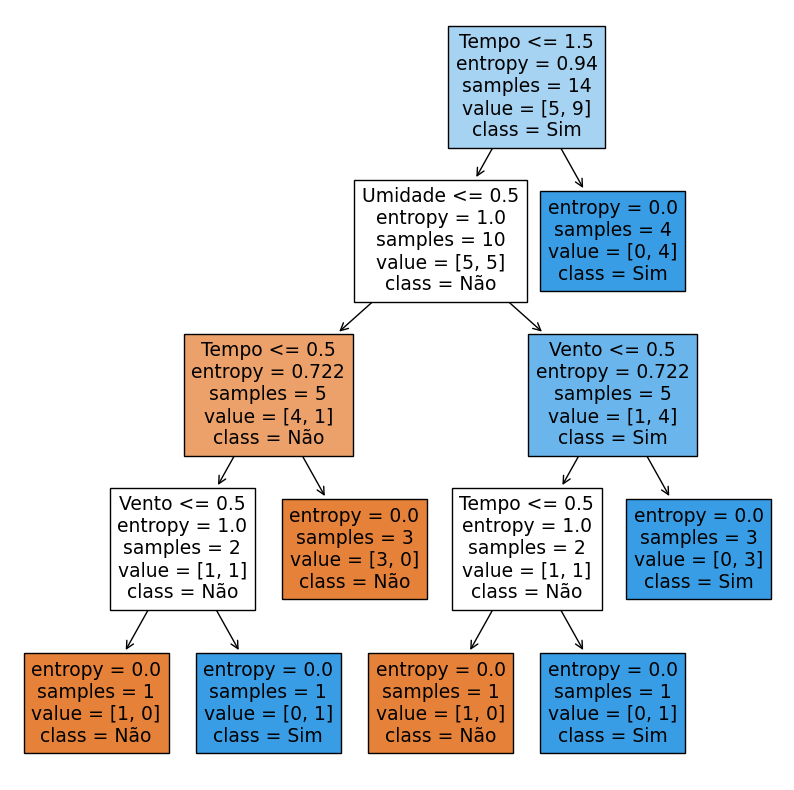

In [21]:
import matplotlib.pyplot as plt
previsores = ['Tempo', 'Temperatura', 'Umidade', 'Vento']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
tree.plot_tree(arvore_jogar_tenis, feature_names=previsores, class_names=arvore_jogar_tenis.classes_, filled=True);